# Overview
In this expirement I attempt to use machine learning to count playing cards and predict the next card drawn. Because the draw of a perfectly shuffled deck is a completly random distrobution, and the fact that there are better ways to code permuatutations mathmatically, I want to explicetly point out that the purpose of this expierment is purely for educational and scientific exploration. If you are looking for a great way to count cards I would suggest using the methods in [this article](https://www.wikihow.com/Count-Cards). These are not the methods I am attempting here and it's worth mentioning that a shuffled deck is an example of a random distrobution. Thus the attempt at making predictions on this data is a moot point. 

# Gathering Data
First we will need to genererate the data and look at the information in our dataset.

In [1]:
from IPython.display import Image

In [2]:
!python generate_deck.py

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'] ['♥', '♦', '♠', '♣']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Card    52 non-null     object
 1   Suit    52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes
None


The data has 52 observations and 2 features. This is exactly what we wanted as it reflects a standard deck. First thing we will need to do is process the data into numeric values in order for a machine learning algorthim can process it.

# Proccessing Data
This script will take the values in the deck and change them from strings to floats. The Jack, Queen, King, and Ace will be valued at 11, 12, 13, and 14 respectively. The suits will be tallied by decimal point so that the are easy to count. The suits will be values as follows:

> '♦':0.000001, '♥':0.0001, '♠':0.01, '♣':0.00000001

This will make it simple to count the number of cards in a sum of card values. For example the entire deck will be worth the value 416.13131313. Since there are 13 of each suit and there are 4 suits, this makes reviewing the suits in a summed value simple. 

In order for our model to find a function to learn, we are going to have to widen the scope of our solution. 

The probability of guessing a card correctly at random from a deck of 52 cards is going to be 1/52. This is because each card drawn is independant from the other cards. However, once the deck begins to thin we can use the information of cards already draw to know what is left in the deck. This still does not leave us with very good chances of predicitng the correct card, and so we will be using a cumulative sum of the cards drawn to predict the value of the next cumulative value of the card drawn and generating a random walk in the probability space. 

There is still a problem with predicting values from a random walk, however combined with the narrow scope of only 52 distinct values, we should be able to get relatively close. 

In [3]:
!python data_proccessing.py

                 0             1   ...            50            51
count  10000.000000  10000.000000  ...  10000.000000  1.000000e+04
mean       8.050015     16.111944  ...    408.153708  4.161313e+02
std        3.751374      5.253427  ...      3.746261  9.050785e-11
min        2.000000      4.000001  ...    402.121313  4.161313e+02
25%        5.000001     12.010100  ...    405.121313  4.161313e+02
50%        8.000100     16.010000  ...    408.131312  4.161313e+02
75%       11.010000     20.000100  ...    411.131313  4.161313e+02
max       14.010000     28.010100  ...    414.131313  4.161313e+02

[8 rows x 52 columns]


Above are the summary statistics of the 10,000 cumulative sums from the first card drawn to the 52nd. 

*It prints as 0 to 51 only becuase the index for these values start at 0.*

# Data Vizualization
Here we will plot the 10,000 random walks and find the trend my plotting the mean value. 

In [4]:
!python cumulative_analysis.py

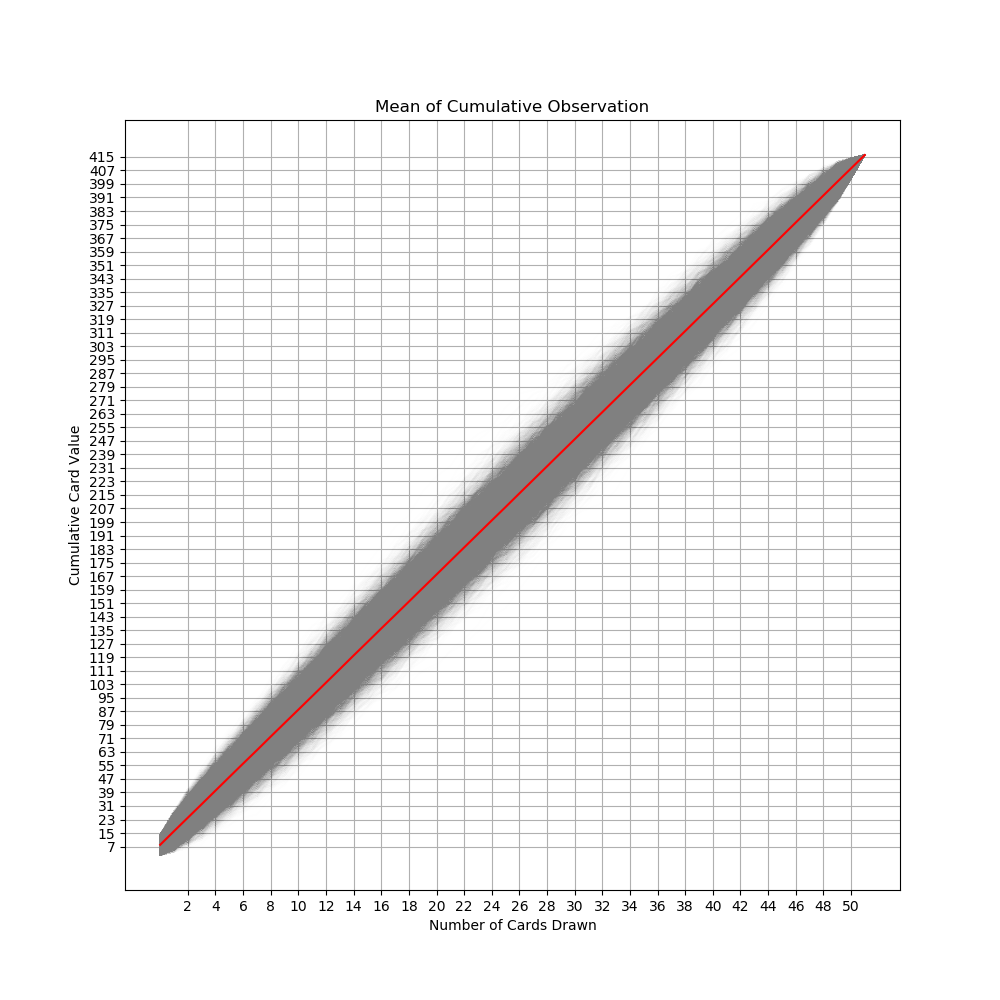

In [5]:
Image(filename='figures/Mean of Cumulative Observation.png')

### Observation
Not so surprisingly there seems to be a perfectly linear measurment of the randomwalks. The grey lines are all 10,000 walks plotted and the red line is the mean. Luckily there is not much variance so we can use this graph to predict what direction the deck is most likely to go, as in it will regress to the mean. This seems like a good case for a linear regression model. It's also worth noting that there are hazy parts converging into the grey portion of the graph. This is becasue these values are not outside of the probability space, but are less likely to occur then the solid portion. 

# Data Modeling 
From here we can fit our cumulative sum to a linear regression model and make a prediction on what values will come up next out of the deck.
- Replace the value in the write method to run a prediciton on the drawn card cumulative value.

*For the purpose of this notebook, I have saved the kernel with the prediction value of 30.*

In [6]:
with open('drawn_card.txt', 'w') as drawn_card:
    drawn_card.write('30') 
!python LinearRegression_model.py

Cross Validation: 80.26206434902139%
Prediction 
Mean:  248.00340642831642 
Range: [ 214.6270386914035 , 284.13235434517094 ]


# Conclusion
The cross validation has returned an accuracy of 80.262%. Which is not great, however we know that this was a long shot from the beginning because the events we are attempting to predict are independant. 


This is telling us that at card number 30, there is an 80% chance that the cumulative sum will be between 214 and 285. We can also assume that the sum will regress to the mean. So if the cumulative value is far above or below the mean, the next card is more likely to be a higher or lower prediciton with the range respectively.

At the very least, we can gain some insight from the cards observed versus the cards still in the deck and take a guess at where the cumulative value will go next. 